In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
#  So far we have learnt about using transfer learning as it is but now we are focusing on using a new kind of transfer learning

!nvidia-smi

Sat Jun 24 05:41:13 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-06-24 05:43:39--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-06-24 05:43:39 (117 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [4]:
# it is a good idea to put functions that we might want to use in a script that we will donwloaad and use in our notebooks or elsewhere. we a
# we have done this for some of the functions that we have used before

from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir
# this time we will be making use of pre trained models in keras pretrained applications and applyt hem to our own problem of recognising images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip



--2023-06-24 05:55:46--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.135.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   148MB/s    in 1.1s    

2023-06-24 05:55:47 (148 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [6]:
unzip_data("10_food_classes_10_percent.zip")


In [7]:
# check out how many images and sub directories in our dataset

walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent

In [8]:
import os
for dirpath,dirname,filename in os.walk('10_food_classes_10_percent'):
  print(f"There are {len(dirname)} in {dirpath} with {len(filename)} files")

There are 2 in 10_food_classes_10_percent with 0 files
There are 10 in 10_food_classes_10_percent/train with 0 files
There are 0 in 10_food_classes_10_percent/train/fried_rice with 75 files
There are 0 in 10_food_classes_10_percent/train/steak with 75 files
There are 0 in 10_food_classes_10_percent/train/hamburger with 75 files
There are 0 in 10_food_classes_10_percent/train/ice_cream with 75 files
There are 0 in 10_food_classes_10_percent/train/grilled_salmon with 75 files
There are 0 in 10_food_classes_10_percent/train/chicken_curry with 75 files
There are 0 in 10_food_classes_10_percent/train/ramen with 75 files
There are 0 in 10_food_classes_10_percent/train/chicken_wings with 75 files
There are 0 in 10_food_classes_10_percent/train/pizza with 75 files
There are 0 in 10_food_classes_10_percent/train/sushi with 75 files
There are 10 in 10_food_classes_10_percent/test with 0 files
There are 0 in 10_food_classes_10_percent/test/fried_rice with 250 files
There are 0 in 10_food_classes_

In [9]:
train_dir = "/content/10_food_classes_10_percent/train/"
test_dir = "/content/10_food_classes_10_percent/test/"

In [10]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                    image_size = (224,224),
                                                                    batch_size = 32,
                                                                    label_mode = "categorical")

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                   image_size = (224,224),
                                                                   label_mode = "categorical",
                                                                   batch_size = 32)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [16]:
train_dataset.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [18]:
for images,labels in train_dataset.take(1):
  print(images, labels)

tf.Tensor(
[[[[ 39.933674   29.933672   27.933672 ]
   [ 37.7449     28.938776   26.341837 ]
   [ 37.642857   29.42857    28.071428 ]
   ...
   [163.19385   146.75508   128.47446  ]
   [168.10211   155.245     136.17355  ]
   [186.03615   176.79642   158.20966  ]]

  [[ 51.341843   43.341843   40.341843 ]
   [ 41.10204    33.10204    30.102041 ]
   [ 38.5        33.285713   30.928572 ]
   ...
   [141.64275   122.7856    105.71417  ]
   [139.79596   125.07149   106.07149  ]
   [151.66858   136.92888   120.500275 ]]

  [[ 47.367348   42.367348   38.367348 ]
   [ 50.30102    45.72959    41.515305 ]
   [ 36.862244   32.862244   30.290815 ]
   ...
   [137.13765   115.70908    99.26011  ]
   [123.1021    103.61743    88.76028  ]
   [140.41356   121.56159   106.4187   ]]

  ...

  [[218.        213.        193.       ]
   [218.        213.        191.       ]
   [216.90817   211.52554   189.52554  ]
   ...
   [ 52.260174   34.168354   23.785736 ]
   [ 47.285645   30.101995   19.65816  ]
   [ 

In [19]:
# we will be working on functional api instead of seuential api
# model0

# creating the base model


In [27]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
# freeze layers in the base model
base_model.trainable = False

inputs = tf.keras.layers.Input(shape = (224,224,3), name = "input_layer")

# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# pass the inputs
x = base_model(inputs)
print("shape after passing inouts through the base model")
print(x.shape)
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(x.shape)

# creating the output activation layer

outputs = tf.keras.layers.Dense(10,activation = "softmax",name = "output_layer")(x)


model0 = tf.keras.Model(inputs,outputs)

shape after passing inouts through the base model
(None, 7, 7, 1280)
(None, 1280)


In [31]:
model0.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

history0 = model0.fit(train_dataset,
                      epochs = 5,
                      steps_per_epoch = len(train_dataset),
                      validation_data = test_dataset,
                      validation_steps = len(test_dataset),
                      callbacks = [create_tensorboard_callback(dir_name = "transfer_learning",
                                                               experiment_name = "model0")])

Saving TensorBoard log files to: transfer_learning/model0/20230624-071052


Epoch 1/5
24/24 [==============================] - 21s 576ms/step - loss: 0.2546 - accuracy: 0.9560 - val_loss: 0.4103 - val_accuracy: 0.8772
Epoch 2/5
24/24 [==============================] - 12s 513ms/step - loss: 0.2118 - accuracy: 0.9693 - val_loss: 0.3976 - val_accuracy: 0.8820
Epoch 3/5
24/24 [==============================] - 12s 512ms/step - loss: 0.1833 - accuracy: 0.9747 - val_loss: 0.3939 - val_accuracy: 0.8800
Epoch 4/5
24/24 [==============================] - 8s 304ms/step - loss: 0.1809 - accuracy: 0.9667 - val_loss: 0.3851 - val_accuracy: 0.8804
Epoch 5/5
24/24 [==============================] - 9s 352ms/step - loss: 0.1585 - accuracy: 0.9800 - val_loss: 0.3829 - val_accuracy: 0.8828


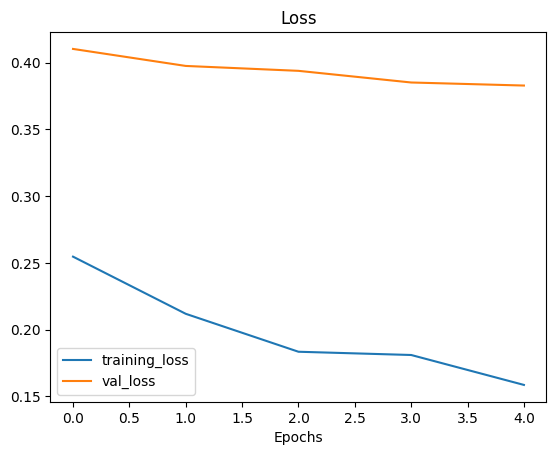

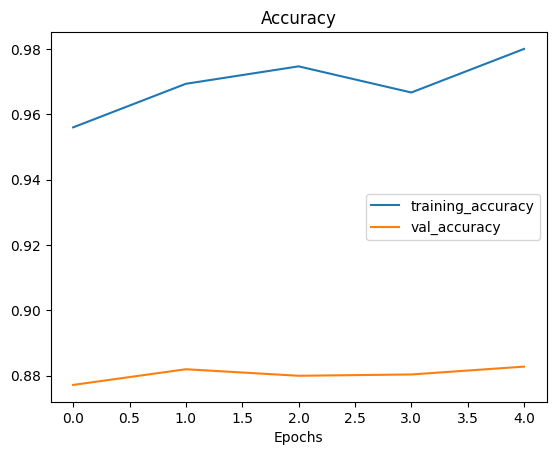

In [32]:
plot_loss_curves(history0)

In [33]:
tf.random.set_seed(42)
input_shape = (1,4,4,3)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor with value: {input_tensor}")


Random input tensor with value: [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]


In [34]:
# passing the random tensor through a global avergae pooling tensor

gapt = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"The shape of the tensor is {gapt.shape} and the value stored is {gapt}")

The shape of the tensor is (1, 3) and the value stored is [[-0.09368646 -0.45840448 -0.2885598 ]]


In [39]:
summa,count = 0,0
for i in range(4):
  for j in range(4):
    summa += input_tensor[0][i][j][0]
    count+=1
print(summa/count)

tf.Tensor(-0.09368647, shape=(), dtype=float32)


In [40]:
# from here on we will be running a series of modelling experiments in the colab notebook based on the kowledge we have gained
# while using these transfer learning based models in our colab notebook



In [41]:
# donwload and unzipping the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2023-06-24 09:02:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.128, 142.250.99.128, 142.250.107.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  89.5MB/s    in 1.4s    

2023-06-24 09:02:37 (89.5 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [42]:
import zipfile
zip_ref = zipfile.ZipFile("/content/10_food_classes_1_percent.zip")
zip_ref.extractall()
zip_ref.close()

In [43]:
train_dir = "/content/10_food_classes_1_percent/train/"
test_dir = "/content/10_food_classes_1_percent/test/"

In [44]:
import os
for dirpath, dirname, filename in os.walk("10_food_classes_1_percent"):
  print(f"There are {len(dirname)} directories and {len(filename)} files in {dirpath}")

There are 2 directories and 0 files in 10_food_classes_1_percent
There are 10 directories and 0 files in 10_food_classes_1_percent/train
There are 0 directories and 7 files in 10_food_classes_1_percent/train/fried_rice
There are 0 directories and 7 files in 10_food_classes_1_percent/train/steak
There are 0 directories and 7 files in 10_food_classes_1_percent/train/hamburger
There are 0 directories and 7 files in 10_food_classes_1_percent/train/ice_cream
There are 0 directories and 7 files in 10_food_classes_1_percent/train/grilled_salmon
There are 0 directories and 7 files in 10_food_classes_1_percent/train/chicken_curry
There are 0 directories and 7 files in 10_food_classes_1_percent/train/ramen
There are 0 directories and 7 files in 10_food_classes_1_percent/train/chicken_wings
There are 0 directories and 7 files in 10_food_classes_1_percent/train/pizza
There are 0 directories and 7 files in 10_food_classes_1_percent/train/sushi
There are 10 directories and 0 files in 10_food_classes